**Imports and workspace setting**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

**Results collected from other notebooks**

In [10]:
models                = ['C4.5', 'Naive bayes', 'LVQ', 'LogisticRegression', 'KNN', 'RandomForest']
accuracy              = [0.929, 0.962, 0.970, 0.975, 0.975, 0.979]
precision_2_benign    = [0.917, 0.993, 0.967, 0.980, 0.980, 0.980]
precision_4_malignant = [0.952, 0.920, 0.978, 0.968, 0.968, 0.978]
precision_micro_avg   = [0.929, 0.963, 0.971, 0.975, 0.975, 0.979]
recall_2_benign       = [0.973, 0.946, 0.986, 0.980, 0.980, 0.986]
recall_4_malignant    = [0.860, 0.989, 0.946, 0.968, 0.968, 0.968]
recall_micro_avg      = [0.929, 0.963, 0.971, 0.975, 0.975, 0.979]
f1score_2_benign      = [0.944, 0.969, 0.976, 0.980, 0.980, 0.983]
f1score_4_malignant   = [0.904, 0.953, 0.962, 0.968, 0.968, 0.973]
f1score_micro_avg     = [0.929, 0.963, 0.971, 0.975, 0.975, 0.979]

**Create a pandas dataframe**

In [11]:
data = [models,
        accuracy, 
        precision_2_benign,
        precision_4_malignant,
        precision_micro_avg,
        recall_2_benign,
        recall_4_malignant,
        recall_micro_avg,
        f1score_2_benign,
        f1score_4_malignant,
        f1score_micro_avg]

results = pd.DataFrame(data)
results = results.transpose()
results.columns = ['model',
                   'accuracy',
                   'precision_2_benign',
                   'precision_4_malignant',
                   'precision_micro_avg',
                   'recall_2_benign',
                   'recall_4_malignant',
                   'recall_micro_avg',
                   'f1score_2_benign',
                   'f1score_4_malignant',
                   'f1score_micro_avg']
results

,model,accuracy,precision_2_benign,precision_4_malignant,precision_micro_avg,recall_2_benign,recall_4_malignant,recall_micro_avg,f1score_2_benign,f1score_4_malignant,f1score_micro_avg
0,C4.5,0.929,0.917,0.952,0.929,0.973,0.86,0.929,0.944,0.904,0.929
1,Naive bayes,0.962,0.993,0.92,0.963,0.946,0.989,0.963,0.969,0.953,0.963
2,LVQ,0.97,0.967,0.978,0.971,0.986,0.946,0.971,0.976,0.962,0.971
3,LogisticRegression,0.975,0.98,0.968,0.975,0.98,0.968,0.975,0.98,0.968,0.975
4,KNN,0.975,0.98,0.968,0.975,0.98,0.968,0.975,0.98,0.968,0.975
5,RandomForest,0.979,0.98,0.978,0.979,0.986,0.968,0.979,0.983,0.973,0.979


Text(0.5, 1.0, 'Accuracy of all models')

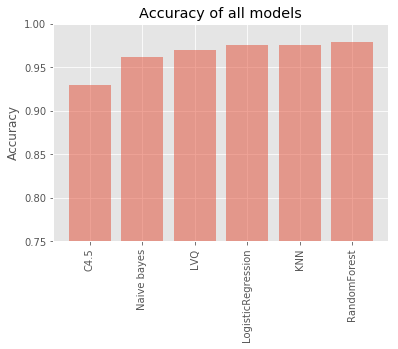

In [12]:
plt.bar(results['model'], results['accuracy'], align='center', alpha=0.5)
plt.ylim(0.75, 1.0)
plt.xticks(rotation='vertical');

plt.ylabel('Accuracy')
plt.title('Accuracy of all models')

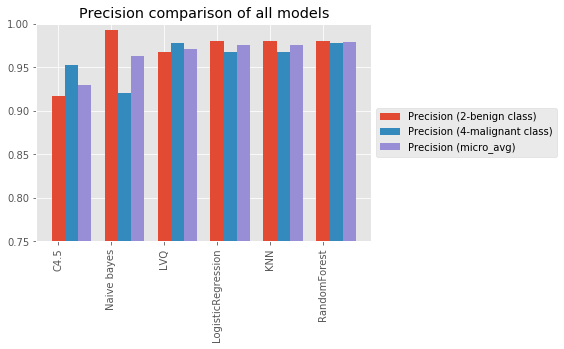

In [13]:
w = 0.25
X = np.arange(6)
plt.bar(X + 0.00, results['precision_2_benign'], width=w, align='center', label='Precision (2-benign class)')
plt.bar(X + 0.25, results['precision_4_malignant'], width=w, align='center', label='Precision (4-malignant class)')
plt.bar(X + 0.50, results['precision_micro_avg'], width=w, align='center', label='Precision (micro_avg)')

plt.xticks(X, models, rotation='vertical');
plt.ylim(0.75, 1.0)
plt.title('Precision comparison of all models')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

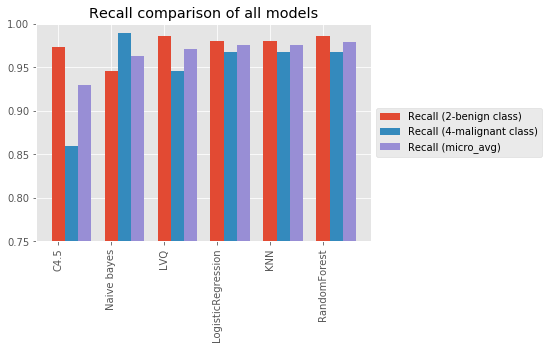

In [14]:
w = 0.25
X = np.arange(6)
plt.bar(X + 0.00, results['recall_2_benign'], width=w, align='center', label='Recall (2-benign class)')
plt.bar(X + 0.25, results['recall_4_malignant'], width=w, align='center', label='Recall (4-malignant class)')
plt.bar(X + 0.50, results['recall_micro_avg'], width=w, align='center', label='Recall (micro_avg)')

plt.xticks(X, models, rotation='vertical');
plt.ylim(0.75, 1.0)
plt.title('Recall comparison of all models')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

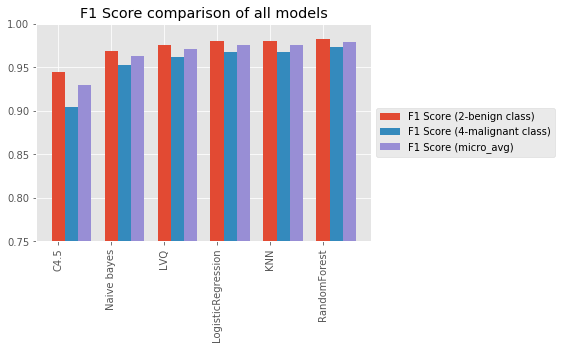

In [15]:
w = 0.25
X = np.arange(6)
plt.bar(X + 0.00, results['f1score_2_benign'], width=w, align='center', label='F1 Score (2-benign class)')
plt.bar(X + 0.25, results['f1score_4_malignant'], width=w, align='center', label='F1 Score (4-malignant class)')
plt.bar(X + 0.50, results['f1score_micro_avg'], width=w, align='center', label='F1 Score (micro_avg)')

plt.xticks(X, models, rotation='vertical');
plt.ylim(0.75, 1.0)
plt.title('F1 Score comparison of all models')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**Conclusion**

1. We have tested following classifiers on the same dataset,
      
      i. Naive bayes (MultiNomial with no parameter )   
      ii. C4.5    
      iii. LVQ   
      iv. Logistic Regression (Balanced class weights)    
      v. KNN (k=5, found using hyper parameter tuning)    
      vi. RandomForest (with hyper parameter tuning)   
      
      
2. RandomForest gave the best results in all measurements overall on average after hyper parameter tuning.
3. c4.5 has been the poorest model out of all.
4. Interestingly NaiveBayes were better to classify Malignant classes since it gave the smallest False negative count. This is because it gave the best recall and precision for the Malignant class, but not as good as other models in terms of F1 score becauese it works poor for benign class.